# The World Factbook Dataset

In this notebook we will be using Python to explore and discover useful information from The World Factbook dataset which contains information on the history, economy, energy, geography, communications and other indicators for 227 countries of the world.

The World Factbook is one of the US Government's most accessed publications and it is continuosly being updated.
Source: https://www.cia.gov/library/publications/the-world-factbook/



## 1. Importing the libraries. These will be our tools:

In [123]:
# data processing
import pandas as pd    

# data visualization
import seaborn as sns  
import matplotlib.pyplot as plt

## 2. Loading and inspecting the dataset

In [124]:
data = pd.read_csv("countries_of_the_world.csv")  # loads a CSV document(Comma Separated Values) into a DataFrame tool


In [125]:
data.columns #look at the columns of the dataset


Index(['country', 'region', 'population', 'area', 'density', 'coastline',
       'migration', 'infant_mortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service'],
      dtype='object')

### Columns explained

population       : estimates from the US Bureau of the Census based on statistics from population censuses

area(sq. mi.)    : sum of all land and water areas delimited by international boundaries and/or coastlines

density          : population per sq. mi.

coastline        : total length of the boundary between the land area (including islands) and the sea (coast/area ratio)

migration(net)   : difference between the number of persons entering and leaving a country during the year per 1,000 persons

infant_mortality : number of deaths per 1,000 live births of children under one year of age

gdp (per capita) : the gross domestic product or value of all final goods and services produced within a nation in a given year. the GDP per capita is the GDP divided by population

literacy(%)      : age 15 and over can read and write, expressed as a percentage

phones(per 1000) : number of mobile phone users per 1,000 persons

arable(%)        : arable land cultivated for crops like wheat, maize, and rice that are replanted after each harvest

crops(%)         : land cultivated for crops like citrus, coffee, and rubber that are not replanted after each harvest, and includes land under flowering shrubs, fruit trees, nut trees, and vines

climate          : description of typical weather regimes throughout the year, split into 4 categories of extremes:

                   driest places on earth (average annual precipitation)        = 1
                   
                   wettest places on earth (average annual precipitation)       = 2
                   
                   coldest places on earth (lowest average monthly temperature) = 3
                   
                   hottest places on earth (highest average monthly temperature)= 4
                   
birthrate        : average annual number of births during a year per 1,000 persons in the population at midyear

deathrate        : average annual number of deaths during a year per 1,000 population at midyear

agriculture, 
industry and 
service          : percentage contribution of agriculture, industry, and services to total GDP.

                   Agriculture includes farming, fishing, and forestry. 
                   
                   Industry includes mining, manufacturing, energy production, and construction. 
                   
                   Services cover government activities, communications, transportation, finance, and all other private   
                   economic activities that do not produce material goods.

In [126]:
data.shape #number of rows and columns

(227, 19)

In [127]:
data.head() #display the first 5 rows from the dataset. 

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,3.0,8.71,6.25,NaN,NaN,NaN


#### You can also show more rows. Uncomment below lines and run them separately, what do you see? 

In [128]:
#data.head(0)
#data.head(1)
#data.head(10)

In [129]:
data.tail()  #shows last 5 rows

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,2.0,41.00,19.93,0.220,0.290,0.489
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,2.0,28.01,21.84,0.179,0.243,0.579


### Did you notice any "NaN" values in the table? 

NaN (or Not a Number) are missing values in the table. These can cause issues when we want to do mathematical operations on the data. Lets see how many of these we have in our data and then lets remove them.

In [130]:
data.isnull().sum()  # counts how many NULL (missing) values there are for each of the columns

country              0
region               0
population           0
area                 0
density              0
coastline            0
migration            3
infant_mortality     3
gdp                  1
literacy            18
phones               4
arable               2
crops                2
climate             22
birthrate            3
deathrate            4
agriculture         15
industry            16
service             15
dtype: int64

To fill in the missing numbers, one technique we can use is to fill in with the mean of the column

In [131]:
data.fillna(data.mean(), inplace=True) #using the "fillna" method and filling in with the column mean

### Indexing

#### What if we wanted to see the values from just one column in the table?

In [132]:
data["area"].head()  # data["area"] - selects just the area column

0     647500
1      28748
2    2381740
3        199
4        468
Name: area, dtype: int64

#### Try it out with other combinations of columns and show more than the first 5 rows! 

In [133]:
#try it out here

In [134]:
selected_rows = data.head(10)          # select first 10 rows
selected_rows.loc[:, ["area","gdp"]] 

#"loc" is a method call that takes 2 arguments: 
#first one, the ":" identifies the rows we want to select. e.g. ":" = all rows, "1:5" = row 1 to 5
#second one, "["area","gdp"]" identifies the columns we want to select, in this case we select the "area" and "gdp" columns

,area,gdp
0,647500,700.0
1,28748,4500.0
2,2381740,6000.0
3,199,8000.0
4,468,19000.0
5,1246700,1900.0
6,102,8600.0
7,443,11000.0
8,2766890,11200.0
9,29800,3500.0


#### Other examples you can try below. Change the parameters and see what happens!

In [135]:
#selected_rows.loc[:5,:]
#selected_rows.loc[::-1,["area"]]

#### How can we see all countries in Western Europe?

In [136]:
data[data["region"] == "WESTERN EUROPE"].head() #selects all rows where the region is equal to "WESTERN EUROPE"

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,3.000000,8.71,6.25,0.150844,0.282711,0.565283
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.000000,452.2,16.91,0.86,3.000000,8.74,9.76,0.018000,0.304000,0.678000
19,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,98.000000,462.6,23.28,0.40,3.000000,10.38,10.27,0.010000,0.240000,0.749000
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.000000,614.6,54.02,0.19,3.000000,11.13,10.36,0.018000,0.246000,0.735000
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,82.838278,503.8,2.14,0.00,2.139024,14.05,8.70,0.270000,0.110000,0.620000


### Sorting

In [137]:
data.sort_values(by="area", ascending=True).head() # here we are passing parameters by name

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.00,7.75,5.43,27000.0,99.000000,1035.6,0.0,0.0,2.139024,9.19,12.91,0.170000,0.282711,0.565283
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,82.838278,877.7,0.0,0.0,2.139024,10.74,9.31,0.150844,0.282711,0.565283
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.00,9.95,5000.0,82.838278,143.0,0.0,0.0,2.000000,24.76,6.70,0.150844,0.282711,0.565283
209,Tuvalu,OCEANIA,11810,26,454.2,92.31,0.00,20.03,1100.0,82.838278,59.3,0.0,0.0,2.000000,22.18,7.11,0.166000,0.272000,0.562000
122,Macau,ASIA (EX. NEAR EAST),453125,28,16183.0,146.43,4.86,4.39,19400.0,94.500000,384.9,0.0,0.0,2.000000,8.48,4.47,0.001000,0.072000,0.927000


#### Try sorting by diferent columns! 

In [138]:
#try it out here

### Grouping rows together by a specific column

#### How many coutries does each region have? 

In [139]:
countries_in_region = data.groupby("region").size()

#### Using the sorting method learned above, can you try sorting the countries in region? 

In [140]:
#countries_in_region. ...write your code here

## 3. Exploring and discovering information from the dataset

### 3.1. What are the top 10 countries with highest GDP?

#### Using what we just learned, we can combine "sort_values" with "head" to show top rows. 
Uncomment the line below and fill in the missing dots to show what we want

In [141]:
#top_ten_gdp = data.sort_values(by=..., ascending=...).head(...)

### 3.2. What are the top 10 most crowded countries?


In [142]:
#data.sort_values(by=..., ascending=...).head(...)

### 3.3. What are the driest countries in the world?


#### We have a column "climate" which contains 4 categories. The driest climate has category 1

In [143]:
#driest_countries = data[...]

### 3.4. What is the driest country in the world that also has the largest area?

In [144]:
#write your code here

### 3.5. What is the total population of all the countries in the world?

In [145]:
#write your code here

### 3.6. What percentage of the world population is using phones?

In [146]:
#Remember that "phones" column represents the number of mobile phone users per 1,000 persons

#write your code here

### 3.7. What is the total arable area of all the countries in the world?

In [147]:
#"arable" column is expressed in percentage:
#arable land cultivated for crops like wheat, maize, and rice that are replanted after each harvest

#write your code here

### 3.8. What is the country with the highest total net migration

In [148]:
#migration(net) : difference between the number of persons entering and leaving a country during the year per 1,000 persons

#write your code here

## 4. Visualizing information from the dataset

Vizualizing data in a graphical format enables us to get a better understanding of large amounts 
of information and try to identify trends/patterns that might be present in our dataset. It is a very powerful tool that enables
scientists to grasp dificult concepts more easily. 

Some common types of data visualization:

    bar and column charts
    pie charts
    heatmaps

### 4.1. Plot the GDP per capita for the top 10 countries with highest GDP

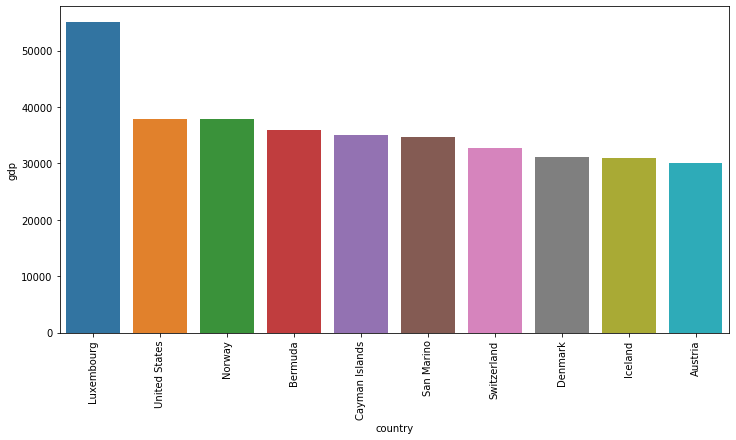

In [149]:
top_ten_gdp = data.sort_values(by = 'gdp', ascending = False).head(10)
plt.subplots(figsize = (12,6))
sns.barplot(x = 'country', y = 'gdp', data = top_ten_gdp)
plt.xticks(rotation = 90)
plt.show()

### 4.2. Given we have data for "phones" and "gdp (per capita)", can we find any correlation between them in the dataset?

In [150]:
#Lets look at the dataset correlation map.
data.corr()

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.022994,-0.039319,-0.043376,-0.030803,0.188201,-0.060741,-0.026439,-0.045075,-0.028354,0.000375,0.099109,-0.080681
area,0.469985,1.000000,-0.066917,-0.095627,0.047442,-0.007159,0.072179,0.035784,0.053360,-0.079674,-0.143844,-0.082128,-0.066389,0.040049,-0.050380,0.120907,-0.054080
density,-0.028190,-0.066917,1.000000,0.241690,0.177990,-0.144200,0.195751,0.095056,0.280079,-0.080999,-0.031655,0.006830,-0.159150,-0.070022,-0.105925,-0.105524,0.187798
coastline,-0.068199,-0.095627,0.241690,1.000000,-0.134035,-0.136465,0.049109,0.113651,0.152050,-0.120636,0.341433,-0.031614,-0.075715,-0.161703,-0.028483,-0.185124,0.181939
migration,0.000011,0.047442,0.177990,-0.134035,1.000000,-0.025015,0.381969,-0.008506,0.239424,-0.057689,-0.340151,-0.014878,-0.066523,0.033605,-0.105674,-0.023679,0.113697
infant_mortality,0.022994,-0.007159,-0.144200,-0.136465,-0.025015,1.000000,-0.600002,-0.745543,-0.669715,-0.113094,-0.061159,-0.342848,0.844968,0.655734,0.697303,0.003510,-0.618623
gdp,-0.039319,0.072179,0.195751,0.049109,0.381969,-0.600002,1.000000,0.497963,0.830549,0.019643,-0.218330,0.302404,-0.648808,-0.201148,-0.570735,-0.027935,0.529995
literacy,-0.043376,0.035784,0.095056,0.113651,-0.008506,-0.745543,0.497963,1.000000,0.549913,0.101927,0.038808,0.352569,-0.755196,-0.386376,-0.585492,0.060661,0.465706
phones,-0.030803,0.053360,0.280079,0.152050,0.239424,-0.669715,0.830549,0.549913,1.000000,0.059606,-0.149517,0.358574,-0.722329,-0.259708,-0.571704,-0.140516,0.625770
arable,0.188201,-0.079674,-0.080999,-0.120636,-0.057689,-0.113094,0.019643,0.101927,0.059606,1.000000,0.094361,0.353444,-0.183449,0.052991,-0.034080,-0.061923,0.088649


The output dataframe can be interpreted by looking at the values at the intersection of a row with a column. The correlation of a row with a column with the same name is 1.00. For that reason all the diagonal values are 1.00.

Correlation coefficients are always values between -1 and 1, where -1 shows a perfect negative correlation and 1 shows a perfect positive correlation.

For example, for two variables, A and B, an increase in A is associated with an increase in B if they have positive correlation and a decrease in B if they have negative correlation.

##### It's quite hard to see possible correlations from the above table format. What better way to understand information if not by using visual images?

Let's try to create a heatmap from the table where values of 1 are coloured with white and values with 0 are coloured with black. Anything in between will be a gradient: black - red - white 

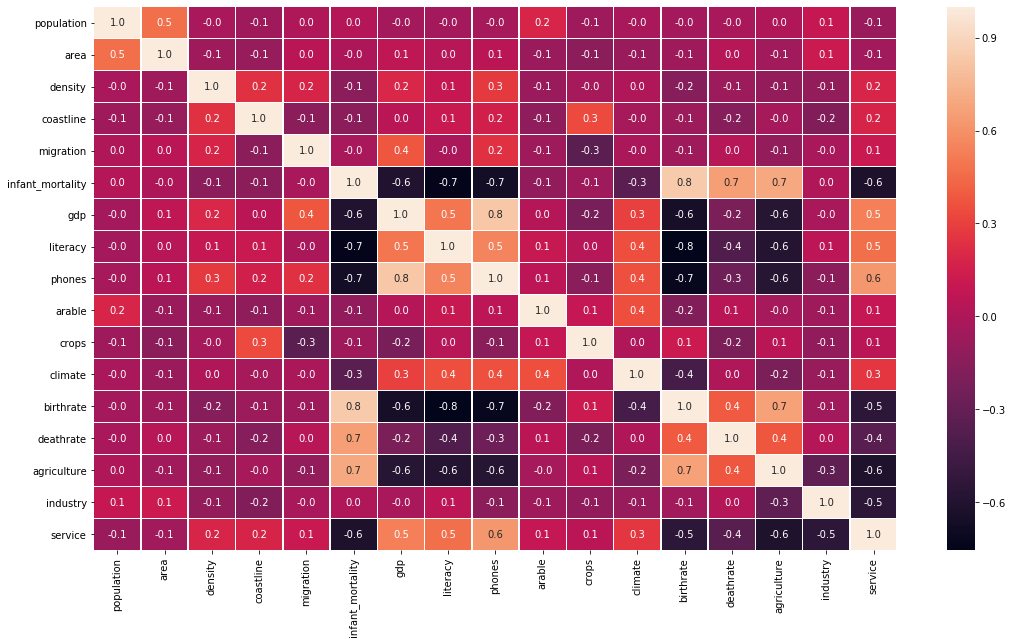

In [151]:
plt.subplots(figsize = (18,10))
#annot = True so we can see the numbers in square, fmt sets how many number of digits we see after after comma
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, fmt = ".1f") 
plt.show()

##### Given above correlation heatmap, do you think there is any relation between GDP (per capita) and Phones?

##### What other correlations can you find in the dataset?

### 4.3. What is the distribution of the infant mortality rates? 

When dealing with large amounts of data, one of the first things that we usually do is we look at how the values are distributed by using a "histogram" plot.

#IMR (infant mortality rate) - the number of deaths per 1,000 live births of children under one year of age

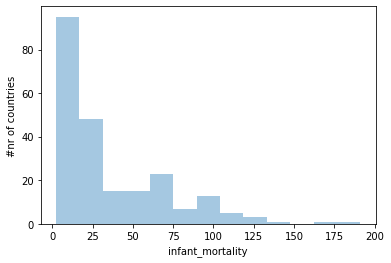

In [152]:
axes = sns.distplot(data["infant_mortality"], kde = False) 
axes.set(xlabel='infant_mortality', ylabel='#nr of countries')
plt.show()

##### What do you think the above plot is showing us? 

##### Is there are correlation between infant mortality rates and the GDP per capita?

##### Can you identify which countries have the highest infant mortality rates?